In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
data=pd.read_excel("data.xlsx")
data.head()

,Client,Unnamed: 1,Unnamed: 2,Contract,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Scoring,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Collection,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Computed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CNP,Gender,Age,DataSemnarii,DataInchis,Number,Produs,CreditLimit,State,scoringdate,...,PenguinIgnoringBNR,DolphinIgnoringBNR,ClientCategory,Comission,Withdrawed,DpdDiffDaysMax,DpdTotal,PaidTotal,FutureTotal,IsDerrogationBNR
2,1900226063350,M,32,2021-10-15 18:37:54,2021-10-16 18:11:03,DK53851057,Penguin,1900,Inchis,2021-10-15 00:31:13,...,0,0,0,0,-1900,-27,0,1907.56,0,NaN
3,1900226063350,M,32,2021-11-06 03:38:12,2021-12-10 12:29:02,TC42768422,Penguin,700,Inchis,2021-10-15 00:31:13,...,0,0,0,0,-700,-22,0,783.58,0,NaN
4,1811228048420,M,41,2021-10-15 10:43:41,2022-01-14 16:20:02,HP51173676,Penguin,2000,Inchis,2021-10-15 07:34:50,...,0,0,0,0,-2000,3,0,2239.08,0,NaN


In [3]:
data.columns = data.iloc[1]
df=data.drop([0,1], inplace=False)
df=df.reset_index()
df=df.drop(df.columns[0],axis=1)

In [4]:
df=df.drop(['CNP','Number'],axis=1)

In [5]:
df.columns

Index(['Gender', 'Age', 'DataSemnarii', 'DataInchis', 'Produs', 'CreditLimit',
       'State', 'scoringdate', 'score', 'ProbabilityOfModel', 'DeclIncome',
       'ANAFIncome', 'TotalLoanPayments', 'BNR40Available', 'CreditsBefore',
       'OfferCrab', 'OfferPenguin', 'OfferDolphin', 'CrabIgnoringBNR',
       'PenguinIgnoringBNR', 'DolphinIgnoringBNR', 'ClientCategory',
       'Comission', 'Withdrawed', 'DpdDiffDaysMax', 'DpdTotal', 'PaidTotal',
       'FutureTotal', 'IsDerrogationBNR'],
      dtype='object', name=1)

In [6]:
df=df.drop([ 'DataSemnarii', 'DataInchis','State', 'scoringdate','ProbabilityOfModel', 'DeclIncome','OfferCrab', 'OfferPenguin', 'OfferDolphin', 'CrabIgnoringBNR',
       'PenguinIgnoringBNR', 'DolphinIgnoringBNR','Comission', 'Withdrawed', 'DpdDiffDaysMax', 'DpdTotal', 'PaidTotal',
       'FutureTotal', 'IsDerrogationBNR','ClientCategory'],axis=1)

In [7]:
df.columns

Index(['Gender', 'Age', 'Produs', 'CreditLimit', 'score', 'ANAFIncome',
       'TotalLoanPayments', 'BNR40Available', 'CreditsBefore'],
      dtype='object', name=1)

In [8]:
numeric_data=['Age','CreditLimit','score','ANAFIncome','TotalLoanPayments', 'BNR40Available', 'CreditsBefore',]
for column in numeric_data:
    df[column]=pd.to_numeric(df[column])

In [9]:
dummy_df = pd.get_dummies(df['Produs'])
df_with_dummies = pd.concat([df, dummy_df], axis=1)
df_with_dummies=df_with_dummies.drop("Produs",axis=1)
df_with_dummies

,Gender,Age,CreditLimit,score,ANAFIncome,TotalLoanPayments,BNR40Available,CreditsBefore,Crab,Dolphin,Penguin
0,M,32,1900,589,4980,1283,709,6,0,0,1
1,M,32,700,589,4980,1283,709,7,0,0,1
2,M,41,2000,608,4868,2847,-2847,7,0,0,1
3,F,40,700,581,4888,3360,-1404,2,0,0,1
4,M,33,900,590,7784,1031,2082,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12511,F,27,2400,520,6346,4810,-2271,22,0,0,1
12512,M,24,2400,539,4298,288,1431,2,0,0,1
12513,M,22,2500,481,4693,1687,190,8,0,0,1
12514,M,22,3200,481,4693,1687,190,9,0,1,0


In [10]:
object_values=[]
ob_coll=df_with_dummies.select_dtypes(object).columns
for column in ob_coll:
     object_values.append(np.count_nonzero(df[column].value_counts()))

In [11]:
lbl_enc=LabelEncoder()
df_with_dummies[ob_coll]=df_with_dummies[ob_coll].astype(str).apply(lbl_enc.fit_transform)

In [12]:
y=df_with_dummies['CreditLimit']
X=df_with_dummies.drop('CreditLimit',axis=1)

In [13]:
df_tot=pd.concat([X,y],axis=1)
df_tot

,Gender,Age,score,ANAFIncome,TotalLoanPayments,BNR40Available,CreditsBefore,Crab,Dolphin,Penguin,CreditLimit
0,1,32,589,4980,1283,709,6,0,0,1,1900
1,1,32,589,4980,1283,709,7,0,0,1,700
2,1,41,608,4868,2847,-2847,7,0,0,1,2000
3,0,40,581,4888,3360,-1404,2,0,0,1,700
4,1,33,590,7784,1031,2082,3,1,0,0,900
...,...,...,...,...,...,...,...,...,...,...,...
12511,0,27,520,6346,4810,-2271,22,0,0,1,2400
12512,1,24,539,4298,288,1431,2,0,0,1,2400
12513,1,22,481,4693,1687,190,8,0,0,1,2500
12514,1,22,481,4693,1687,190,9,0,1,0,3200


<Axes: >

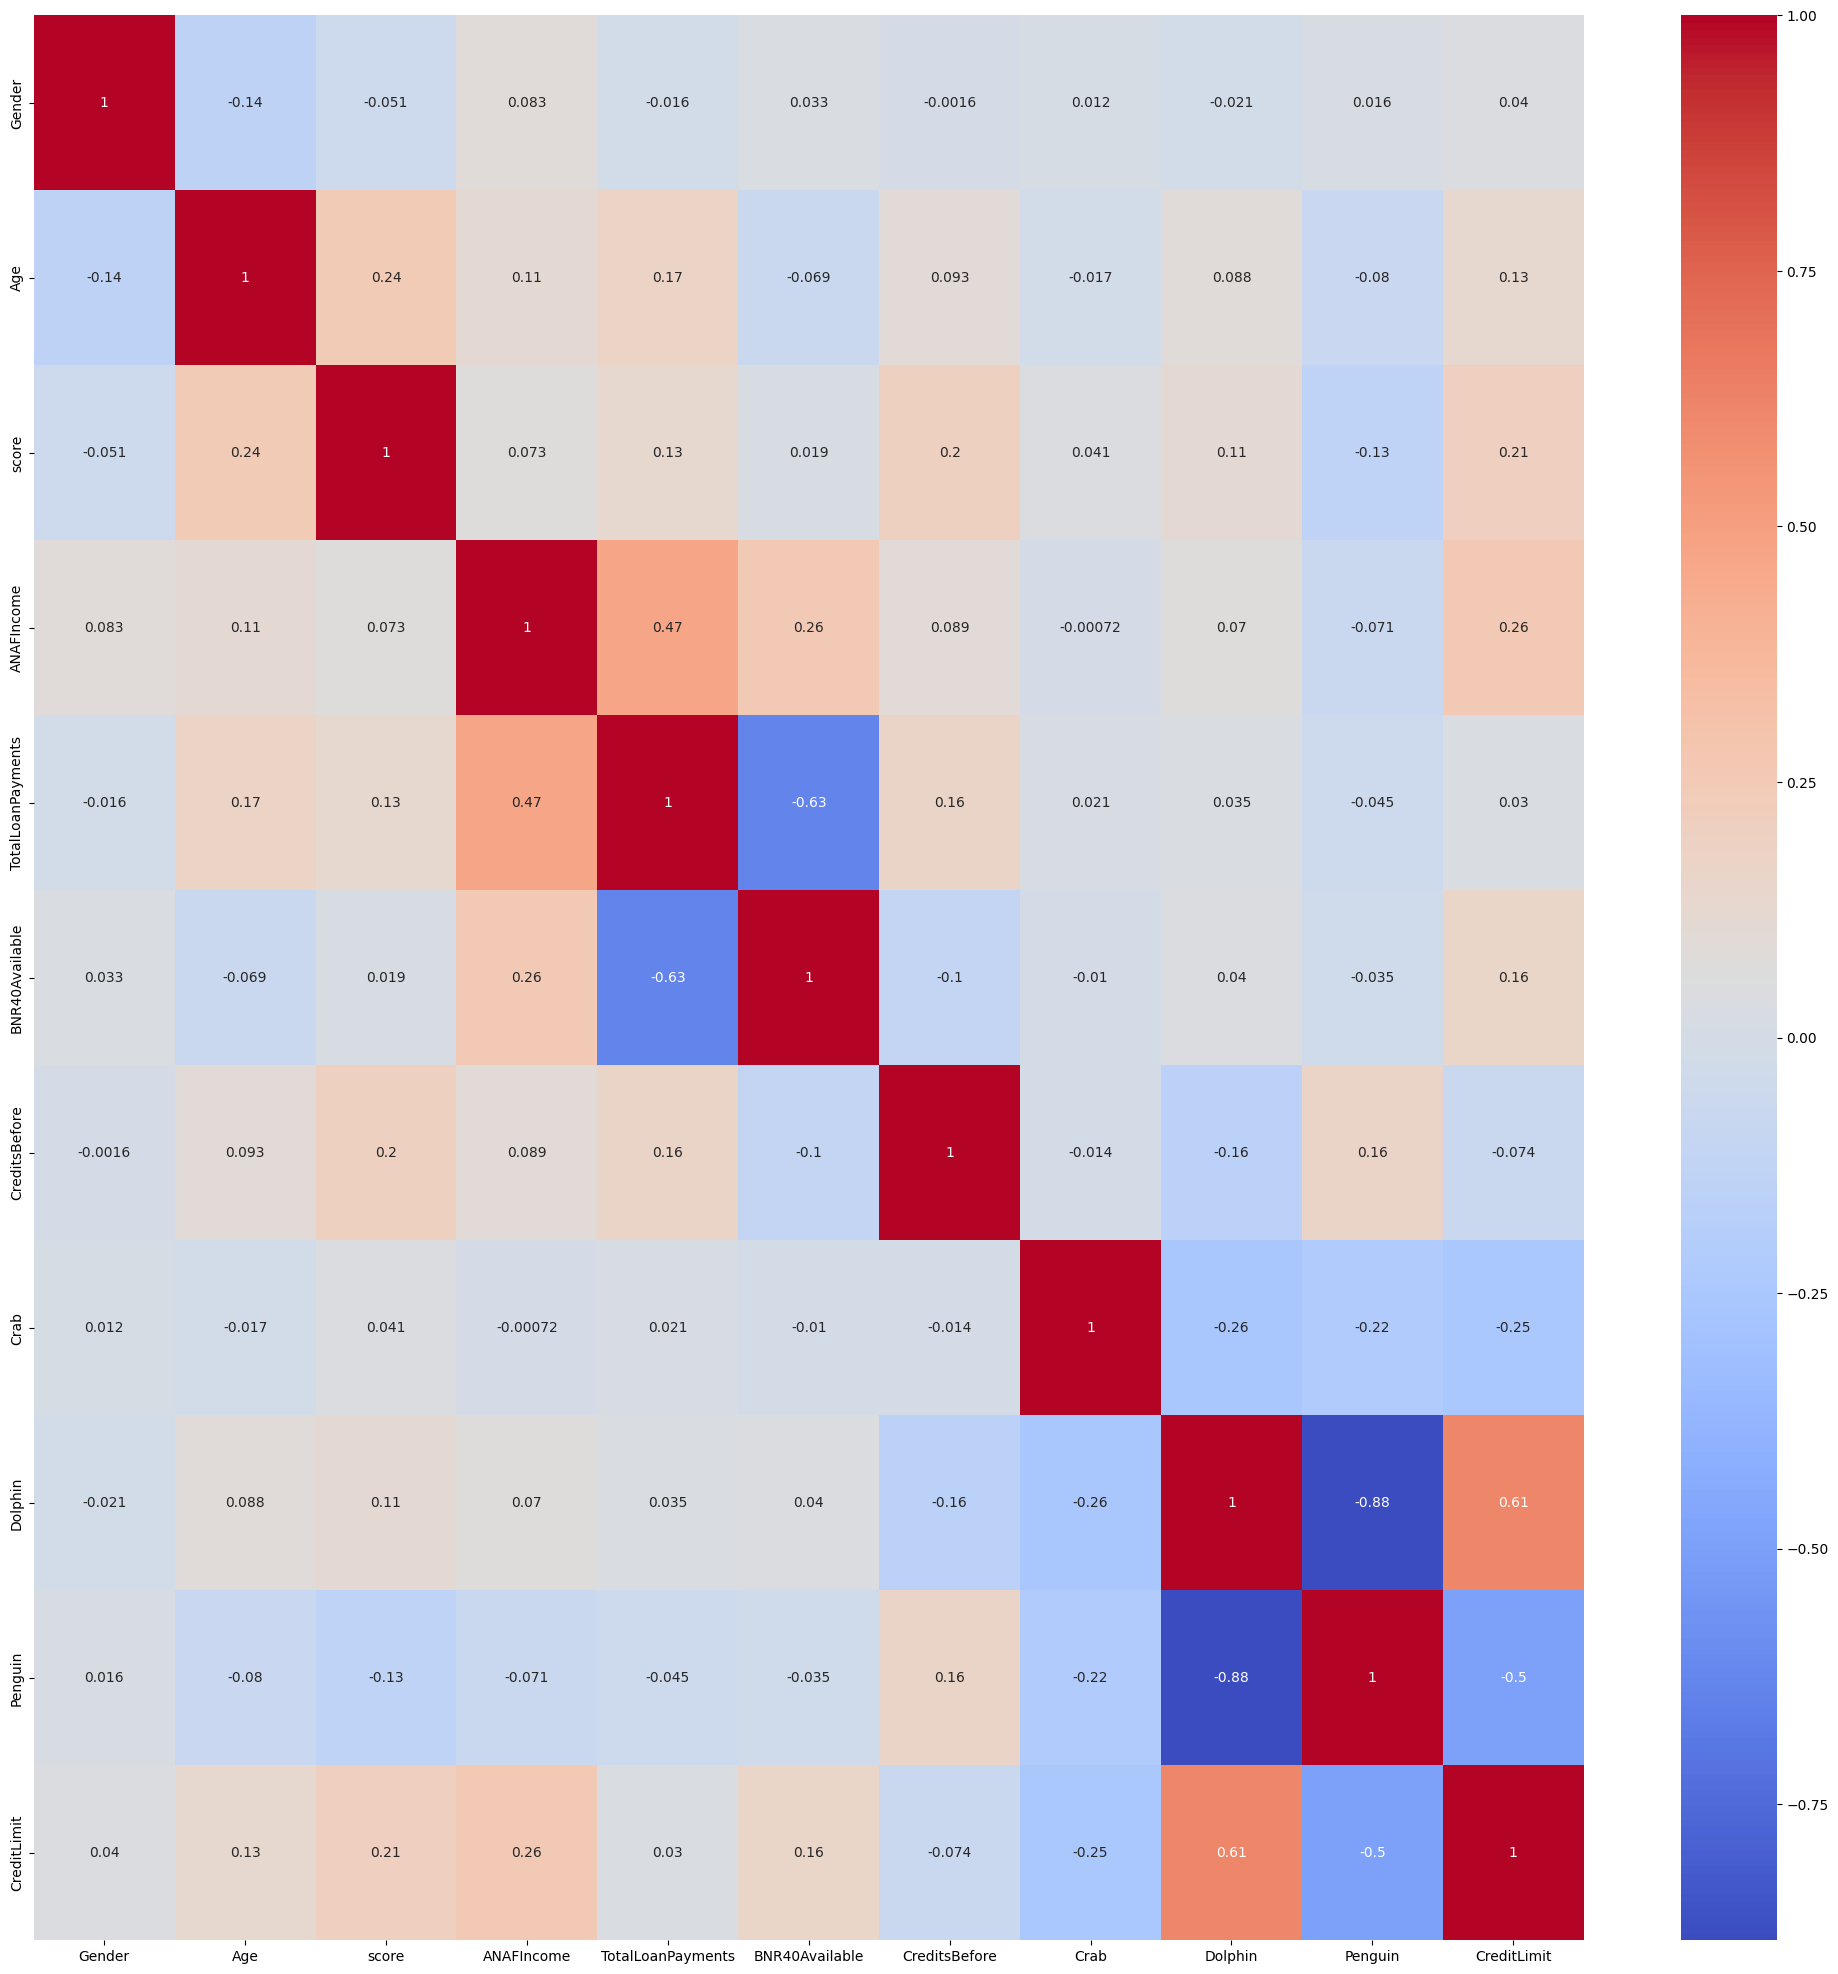

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df_tot.corr(),annot=True,cmap='coolwarm')

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
row=X_train.iloc[1]


In [17]:
X_train.columns

Index(['Gender', 'Age', 'score', 'ANAFIncome', 'TotalLoanPayments',
       'BNR40Available', 'CreditsBefore', 'Crab', 'Dolphin', 'Penguin'],
      dtype='object')

In [18]:
row

Gender                  0
Age                    56
score                 587
ANAFIncome           2620
TotalLoanPayments    1737
BNR40Available       -689
CreditsBefore           6
Crab                    0
Dolphin                 1
Penguin                 0
Name: 3455, dtype: int64

In [19]:
import lightgbm as lgb


lgb_regressor = lgb.LGBMRegressor()

lgb_regressor.fit(X_train, y_train)

y_pred = lgb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(r2_score(y_test, y_pred))
print("Mean Squared Error:", mse)

0.7138861149109438
Mean Squared Error: 1021023.4299440784


In [20]:
row=X_train.iloc[311]
lgb_regressor.predict(row.values.reshape(1,-1))

array([3671.93616009])

In [21]:
y_train.iloc[311]


4000

In [22]:
with open('model_limit.pkl', 'wb') as file:
    pickle.dump(lgb_regressor, file)